In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Object Detection and Object Tracking

### Detection using colors (HSV)

In [ ]:
# In detection by using Colors we should use HSV !!
# We use HSV (H:Hue, S:Saturation, V:Value)
# Hue: 360 degree of colors , each region of 360 cylinder represent color
# Saturation: Depth of color  ( التشبع بتاع اللون )
# Value: (الفاتح والغامق)

#### Detecting Blue shapes

In [6]:
img = cv2.imread('images/smarties.jpg')

# Converting to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# To get blue color we put lower band and upper band in HSV
l_b = np.array([110,50,50])      # Lower H,S,V
u_b = np.array([130,255,255])    # Upper H,S,V
# mask
mask = cv2.inRange(hsv, l_b, u_b)

# result
# to apply mask we use and(img,img, mask)
res = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("Detecting Blue Ball", img)
cv2.imshow("Mask", mask)
cv2.imshow("Result", res)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Case Study 1: Detecting Shapes based on Track bar colors

In [1]:
import cv2
import numpy as np

def nothing(x):
    pass
    

# create a black window
cv2.namedWindow('image')  ## Creating an image window with Named image
                          ## So we can use trackbar
cv2.resizeWindow("image", 400, 300)
    
# create trackBars
cv2.createTrackbar('Lower H', 'image', 0, 255, nothing)
cv2.createTrackbar('Upper H', 'image', 255, 255, nothing)
cv2.createTrackbar('Lower S', 'image', 0, 255, nothing)
cv2.createTrackbar('Upper S', 'image', 255, 255, nothing)
cv2.createTrackbar('Lower V', 'image', 0, 255, nothing)
cv2.createTrackbar('Upper V', 'image', 255, 255, nothing)


while True:
    raw_img = cv2.imread('images/smarties.jpg')
    # Converting to HSV
    hsv = cv2.cvtColor(raw_img, cv2.COLOR_BGR2HSV)
    
    u_h = cv2.getTrackbarPos('Upper H', 'image')
    l_h = cv2.getTrackbarPos('Lower H', 'image')
    u_s = cv2.getTrackbarPos('Upper S', 'image')
    l_s = cv2.getTrackbarPos('Lower S', 'image')
    u_v = cv2.getTrackbarPos('Upper V', 'image')
    l_v = cv2.getTrackbarPos('Lower V', 'image')
    

    l_b = np.array([l_h, l_s, l_v])      # Lower H,S,V
    u_b = np.array([u_h, u_s, u_v])    # Upper H,S,V
    

    mask = cv2.inRange(hsv, l_b, u_b)
    res = cv2.bitwise_and(raw_img, raw_img, mask=mask)
    
    # Showing Images
    cv2.imshow('res', res)
    cv2.imshow('mask', mask)
    cv2.imshow('raw', raw_img)
    
    k = cv2.waitKey(1)
    if k == 27:  # Press ESC to close !!
        break
    
        

cv2.destroyAllWindows()

### Case Study 2: Detect using Colors on Video

In [2]:
import cv2
import numpy as np

def nothing(x):
    pass
    

# create a black window
cv2.namedWindow('image')  ## Creating an image window with Named image
                          ## So we can use trackbar
cv2.resizeWindow("image", 400, 300)
    
# create trackBars
cv2.createTrackbar('Lower H', 'image', 0, 255, nothing)
cv2.createTrackbar('Upper H', 'image', 255, 255, nothing)
cv2.createTrackbar('Lower S', 'image', 0, 255, nothing)
cv2.createTrackbar('Upper S', 'image', 255, 255, nothing)
cv2.createTrackbar('Lower V', 'image', 0, 255, nothing)
cv2.createTrackbar('Upper V', 'image', 255, 255, nothing)

cap = cv2.VideoCapture(0)
cap.set(3, 720)
cap.set(4, 720)



while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
    
        # Converting to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        u_h = cv2.getTrackbarPos('Upper H', 'image')
        l_h = cv2.getTrackbarPos('Lower H', 'image')
        u_s = cv2.getTrackbarPos('Upper S', 'image')
        l_s = cv2.getTrackbarPos('Lower S', 'image')
        u_v = cv2.getTrackbarPos('Upper V', 'image')
        l_v = cv2.getTrackbarPos('Lower V', 'image')

        l_b = np.array([l_h, l_s, l_v])      # Lower H,S,V
        u_b = np.array([u_h, u_s, u_v])    # Upper H,S,V
    
        mask = cv2.inRange(hsv, l_b, u_b)
        res = cv2.bitwise_and(frame, frame, mask=mask)

        # Showing Images
        cv2.imshow('res', res)
        cv2.imshow('mask', mask)
        cv2.imshow('raw', frame)
    
    k = cv2.waitKey(1)
    if k == 27:  # Press ESC to close !!
        break
    
cv2.destroyAllWindows()        
cap.release()

## Segmentation - Thresholding (Binarization)

### Global Thresholding

In [7]:
img = cv2.imread('images/geeks14.png', 0)  # gray scale

_, th = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

# THRESH_BINARY            > th = WHITE
# THRESH_BINARY_INV        > th = DARK
# THRES_TRUNC              > th = Stay same  
#                          < th = th
# THRESH_TOZERO            > th = DARK

cv2.imshow("Image", img)   
cv2.imshow("Threshold 55", th)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Adaptive Thresholding  (Used in different Brightness)
- We use this in most cases !!
- As the image will have darker area in part of the image

In [20]:
img = cv2.imread('images/sudoko.jpg', 0)
_, th = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Adaptive thresholding
# 1- MEAN --> avg all elements in the block filter - C ( this is the threshold)
# 2- GAUSSIAN  --> weighted avg of all elements in the block filter - C
mean_th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 2)
gaussian_th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 2)

# cv2.imshow("Image", img)
cv2.imshow("Threshold", th)
cv2.imshow("Mean Threshold", mean_th)
cv2.imshow("Gaussian", gaussian_th)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Otsu's Segmentation (When you dont know threshold)

In [2]:
img = cv2.imread('images/geeks14.png', 0)  # gray scale

_, th = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # Global Threshold

_, th_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)



cv2.imshow("Image", img)   
cv2.imshow("Threshold Global", th)
cv2.imshow("Threshold Otsu", th_otsu)


cv2.waitKey(0)
cv2.destroyAllWindows()

## Morphological Transformation (On Binary Images)
- Read img
- Thresholding (Binarization)
- Build Kernel and use it for:
- Morphological Transformation to remove Noise
- - Dilation --> Tmaddod (Increase Whites)
- - Erosion  --> 3ask Dilation (Increase Darks)
- - Opening  --> Make Dilation then Make Erosion
- - Closing  --> 3aks Opening : Erosion then Dilation

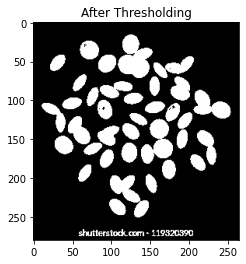

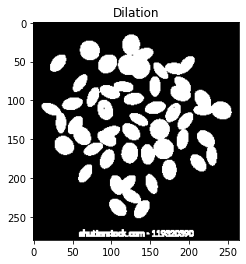

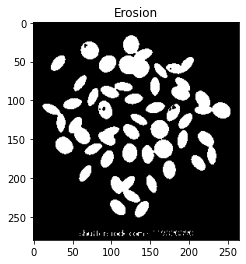

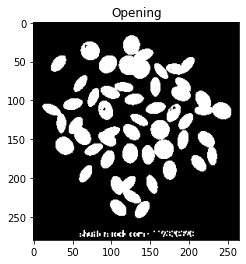

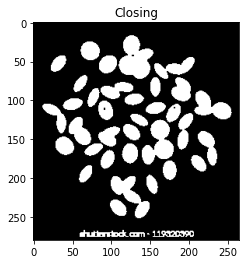

In [38]:
# Read img
img_gray = cv2.imread('images/smarties.jpg', 0)

# Thresholding
_, mask = cv2.threshold(img_gray, 220, 255, cv2.THRESH_BINARY_INV)
# We notice there is small black holes inside each ball

# Kernel
kernel = np.ones((2,2), np.uint8)  # HyperParameter

# Transformation
dilation = cv2.dilate(mask, kernel, iterations=1) # Good but increase the ball area
erosion = cv2.erode(mask, kernel, iterations=1)   # Erode the balls
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1) # Best Result



plt.imshow(mask, 'gray')
plt.title('After Thresholding')
plt.show()

plt.imshow(dilation, 'gray')
plt.title("Dilation")
plt.show()

plt.imshow(erosion, 'gray')
plt.title("Erosion")
plt.show()

plt.imshow(opening, 'gray')
plt.title("Opening")
plt.show()

plt.imshow(closing, 'gray')
plt.title("Closing")
plt.show()

## Smoothing & Bluring

### Bluring (To remove noise)

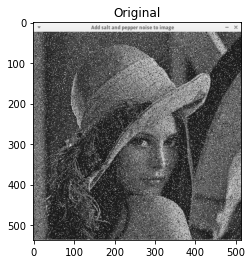

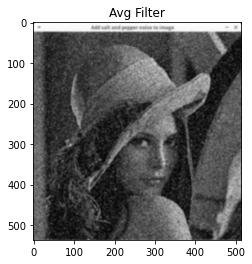

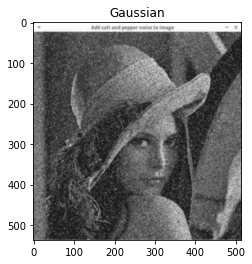

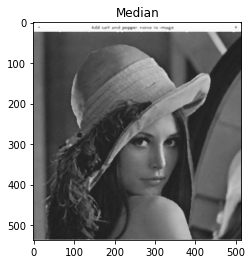

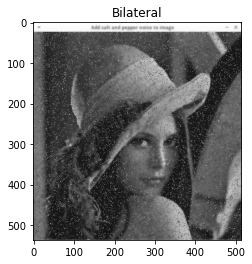

In [41]:
img = cv2.imread('images/salt_pepper.png', 0)

# Bluring --> Remove Noise
averaging = cv2.blur(img, (5,5))         # Mean for kernel
gblur = cv2.GaussianBlur(img, (5,5), 0)  # For noise images but not all types, Concentrare on centers
median = cv2.medianBlur(img, 5)      # For salt & pepper images (BEST RESULT)
bilateral = cv2.bilateralFilter(img, 9, 75, 75)  # Preserve the border(edges)


plt.imshow(img, 'gray')
plt.title("Original")
plt.show()

plt.imshow(averaging, 'gray')
plt.title("Avg Filter")
plt.show()

plt.imshow(gblur, 'gray')
plt.title("Gaussian")
plt.show()

plt.imshow(median, 'gray')
plt.title("Median")
plt.show()

plt.imshow(bilateral, 'gray')
plt.title("Bilateral")
plt.show()

## Edge Detection
- Laplacian
- Sobel x, Sobel y
- Canny Edge Detection Algorithm
<br>

- - In myself Photo --> Laplacian was best
- - In Sudoko photo --> Combined Sobel was best

### Laplacian and Sobel

In [48]:
img = cv2.imread('images/sudoko.jpg', 0)
img = cv2.resize(img, (500,500))

# La Placian
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)   #CV_64F to convert from uint to 64 float
                                                # Ksize--> Kernel Size (best = 3)
lap2 = np.uint8(np.absolute(lap))   # Inverse (More accurate)
    
    
# Sobel
sobel_X = cv2.Sobel(img, cv2.CV_64F, 0, 1)
sobel_X = np.uint8(np.absolute(sobel_X))

sobel_Y = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobel_Y = np.uint8(np.absolute(sobel_Y))

# Combined Sobel ( ORing X and Y)
combine_X_Y = cv2.bitwise_or(sobel_X, sobel_Y)



cv2.imshow('image', img)
# cv2.imshow('laplacian', lap)
cv2.imshow('modified lap', lap2)
cv2.imshow('Sobel X', sobel_X)
cv2.imshow('Sobel Y', sobel_Y)
cv2.imshow('Combined Sobel', combine_X_Y)

cv2.waitKey(0)
cv2.destroyAllWindows()


### Canny Edge Detection Algorithm
Getting Strong Edges only !!
- Convert RGB to Gray by equation: y = 0.299R + 0.587G + 0.114B
- Remove Noise by using Gaussian filter
- Get Sobel X and Sobel Y
- Combine them by using Edge Gradient
- Apply Non-maximum Suppression to make edges thin
- Hysteresis Thresholding to connect strong Edges and ignore others


In [54]:
imgs = []
my_self_img = cv2.imread('images/my_self.jpg')
my_self_img = cv2.resize(my_self_img, (500,500))
sudoko_img = cv2.imread('images/sudoko.jpg')

self_canny = cv2.Canny(my_self_img, 100, 200)
sudoko_canny = cv2.Canny(sudoko_img, 100, 200)

cv2.imshow("Canny_self", self_canny)
cv2.imshow("Canny_Sudoko", sudoko_canny)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Detection of Contours, Num of Contours, Closed Objects
- Same as Edge Detection but for closed objects
<br>
- Convert image to Gray
- we must convert Gray Image to Binarization (Black/White)
- Find Contours
- Draw them on original Image

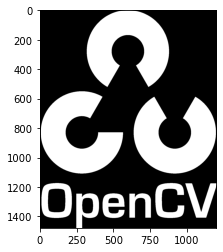

Number of Contours =  12


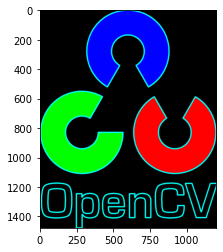

In [94]:
img = cv2.imread('images/opencv.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, 0, 255, 0)
plt.imshow(thresh, 'gray')
plt.show()


contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Number of Contours = ", len(contours))

# print(contours[0])

cv2.drawContours(img, contours, -1, (0,255,250), 7)  # -1 means: draw all contours

plt.imshow(img)
plt.show()

## Images Pyramids (Downsampling Image/ Upsampling)
Each step: Blur the image more

- Gaussian Pyramid (pyrDown, pyrUp)
- Laplacian Pyramid: Generated from Gaussian and used for image Reconstruction and blending

### Gaussian Pyramid

In [4]:
img = cv2.imread('images/my_self.jpg')
print("Original Image ",img.shape)

layer1 = cv2.pyrDown(img)  # Downsamples to half
print("Layer1 DownSample Image ",layer1.shape)

layer2 = cv2.pyrDown(layer1)  # Downsamples to half
print("Layer2 DownSample Image ",layer2.shape)

layer_up = cv2.pyrUp(layer2)   # More blurred than layer1
print("UpLayer UpSample Image ",layer_up.shape)



cv2.imshow('lr1', layer1)
cv2.imshow('lr2', layer2)
cv2.imshow('lr_up', layer_up)


cv2.waitKey(0)
cv2.destroyAllWindows()

Original Image  (2048, 2035, 3)
Layer1 DownSample Image  (1024, 1018, 3)
Layer2 DownSample Image  (512, 509, 3)
UpLayer UpSample Image  (1024, 1018, 3)


### Laplacian Pyramid
- Getting Error between Original and PyrDown then PyrUp image

In [6]:
pass

## Images Blending
Using Gaussian and Laplacian Pyramids to combine two images together without noticing the seperating line
- Hasay7hom 3la Ba3d

In [69]:
# Video 
# https://www.youtube.com/watch?v=nsdXccq-Ma8&list=PLyhJeMedQd9QrXtCspclJ9ace2urp05o0&index=24&ab_channel=Ahmedibrahim